In [1]:
import torch
import torch.nn as nn
import pandas as pd

from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split as tts

In [2]:
def accuracy_fn_binary(y_pred, y_train):
    # Converting logits to labels
    predicted_classes = torch.round(torch.sigmoid(y_pred))
    correct_predictions = torch.eq(predicted_classes.squeeze(), y_train).sum().item()
    acc = (correct_predictions / len(y_train)) * 100
    return acc

In [3]:
# Step by step to create a model:
# Create the X and y  datasets
# Create the nn.Module class
# Define optimizer and loss or criterion
# Create train FOR (need contain)
# 1. Model.train(), y_pred = model(X_train), loss = loss_fn(y_pred, y_train), opt.zero_grad()
# 2. loss.backward(), opt.step()

# Now, we need to evaluate the model:
# 1. model.eval(), with torch.inference_mode():

# And after, we'll see if its worth

In [4]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [5]:
dataset = pd.read_csv('/content/drive/MyDrive/PyTorch/binary_classification/skin_cancer_project/data.csv')

# Reading the dataset

dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [6]:
dataset = dataset.drop('Unnamed: 32', axis=1)

X,y = dataset.drop('diagnosis', axis=1), dataset['diagnosis']
X.drop(['id'], axis=1)

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [7]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

X = X.to_numpy()

X, y = torch.tensor(X, dtype=torch.float), torch.tensor(y, dtype=torch.float)


In [8]:
X_train, X_test, y_train, y_test = tts(X,y, test_size=0.25,
                                       random_state=42,
                                       shuffle=False)

In [9]:
from sklearn.preprocessing import MinMaxScaler as mms

norm = mms().fit(X_train)

X_train = norm.transform(X_train)
X_test = norm.transform(X_test)

X_train, X_test = torch.from_numpy(X_train).type(torch.float), torch.from_numpy(X_test).type(torch.float)
y_train, y_test = y_train.long(), y_test.long()

len(X)

569

In [10]:
class BinaryClassification(nn.Module):
      def __init__(self):
          super().__init__()

          self.Layer1 = nn.Linear(31, 61)
          self.Layer2 = nn.Linear(61,51)
          self.Layer3 = nn.Linear(51,31)
          self.Layer4 = nn.Linear(31,1)

          self.relu = nn.ReLU()
          self.lrelu = nn.LeakyReLU()

      def forward(self, x):
          x = self.Layer1(x)
          x = self.relu(x)
          x = self.Layer2(x)
          x = self.lrelu(x)
          x = self.Layer3(x)
          x = self.relu(x)
          x = self.Layer4(x)
          return x


In [11]:
model = BinaryClassification()

optimizer = torch.optim.SGD(model.parameters(),
                            lr=0.01,
                            momentum=0.9)

loss_fn = nn.BCEWithLogitsLoss()

In [12]:
# Train
torch.manual_seed(40)

train_losses, train_accuracies = [], []
test_losses, test_accuracies = [], []

epochs = 1000

for epoch in range(epochs):
    model.train()
    y_pred = model(X_train)

    loss = loss_fn(y_pred.squeeze(), y_train.float())
    acc  = accuracy_fn_binary(y_pred=y_pred,
                       y_train=y_train)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    model.eval()

    train_losses.append(loss.item())
    train_accuracies.append(acc)



    with torch.inference_mode():
         logits = model(X_test).squeeze()
         test_pred = torch.round(torch.sigmoid(logits))

         test_loss = loss_fn(logits,
                             y_test.float())

         test_acc = accuracy_fn_binary(y_pred=y_test.float(),
                                       y_train=test_pred)

         test_logits = model(X_test).squeeze()
         test_predictions = torch.round(torch.sigmoid(test_logits)).int()

         test_losses.append(test_loss.item())
         test_accuracies.append(test_acc)

    if epoch % 100 == 0:
       print(f'Epoch: {epoch} | Loss: {loss:.5f}, Acc: {acc:.2f}% | Test Loss: {test_loss:.5f}, Test Acc: {test_acc:.2f}%')


Epoch: 0 | Loss: 0.68898, Acc: 58.45% | Test Loss: 0.68446, Test Acc: 75.52%
Epoch: 100 | Loss: 0.64403, Acc: 58.45% | Test Loss: 0.59849, Test Acc: 76.22%
Epoch: 200 | Loss: 0.20330, Acc: 95.54% | Test Loss: 0.20826, Test Acc: 97.20%
Epoch: 300 | Loss: 0.09066, Acc: 96.95% | Test Loss: 0.09416, Test Acc: 99.30%
Epoch: 400 | Loss: 0.07198, Acc: 97.65% | Test Loss: 0.07906, Test Acc: 98.60%
Epoch: 500 | Loss: 0.06444, Acc: 97.89% | Test Loss: 0.07380, Test Acc: 97.90%
Epoch: 600 | Loss: 0.05957, Acc: 97.89% | Test Loss: 0.06988, Test Acc: 97.20%
Epoch: 700 | Loss: 0.05594, Acc: 97.89% | Test Loss: 0.06662, Test Acc: 97.20%
Epoch: 800 | Loss: 0.05312, Acc: 97.89% | Test Loss: 0.06456, Test Acc: 97.20%
Epoch: 900 | Loss: 0.05087, Acc: 97.89% | Test Loss: 0.06313, Test Acc: 97.20%


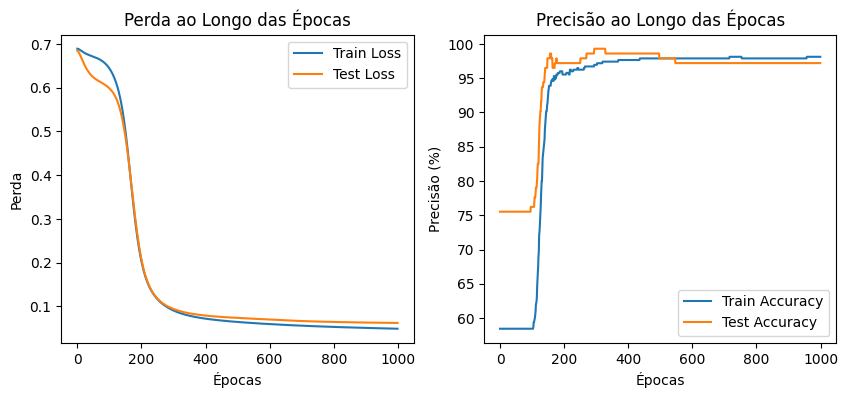

In [13]:
import matplotlib.pyplot as plt

# Gráfico de Perda
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Train Loss')
plt.plot(test_losses, label='Test Loss')
plt.title('Perda ao Longo das Épocas')
plt.xlabel('Épocas')
plt.ylabel('Perda')
plt.legend()



# Gráfico de Precisão
plt.subplot(1, 2, 2)
plt.plot(train_accuracies, label='Train Accuracy')
plt.plot(test_accuracies, label='Test Accuracy')
plt.title('Precisão ao Longo das Épocas')
plt.xlabel('Épocas')
plt.ylabel('Precisão (%)')
plt.legend()

plt.show()

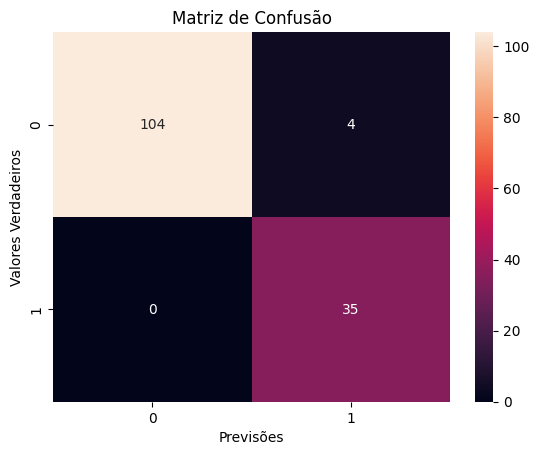

In [14]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test.int(), test_predictions)
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Previsões')
plt.ylabel('Valores Verdadeiros')
plt.title('Matriz de Confusão')
plt.show()
